# Analysis 
----

1. The maximum temperature has strong relationship with latitude. The temperature reaches the peak as latitude approach to 20.
2. Latitude and cloudiness have little relationship between each other.
3. Latitude and wind speed have little relationship between each other.

# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
url = f"{base_url}units=imperial&appid={weather_api_key}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
import json
import pprint
response = requests.get(url+city).json()
pprint.pprint(response)

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 71.69, 'lon': 128.87},
 'dt': 1592829381,
 'id': 2015306,
 'main': {'feels_like': 31.91,
          'grnd_level': 1015,
          'humidity': 85,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 38.1,
          'temp_max': 38.1,
          'temp_min': 38.1},
 'name': 'Tiksi',
 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0},
 'timezone': 32400,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 17, 'speed': 5.19}}


In [5]:
name = []
cloudiness = []
country=[]
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print('''Beginning Data Retrieval
-----------------------------''')

# initial count method for both processing and set records
processing_record = 1
set_record = 1

for c, city in enumerate(cities):
    
    # if the count number divided by 50 with remainder equals zero, and the count number is greater than 50
    if (c % 50 == 0 and c>50):
        
        # set record increased by 1
        set_record += 1
        
        # processing_record start from zero
        processing_record = 0 
    
    try:
        weather = requests.get(url + city).json()
        
        #Insert data into lists
        name.append(weather["name"])
        cloudiness.append(weather["clouds"]["all"])
        country.append(weather["sys"]["country"])
        date.append(weather["dt"])
        humidity.append(weather["main"]["humidity"])
        lat.append(weather["coord"]["lat"])
        lng.append(weather["coord"]["lon"])
        max_temp.append(weather["main"]["temp_max"])
        wind_speed.append(weather["wind"]["speed"])
        print(f"Processing Record {processing_record} of set {set_record} | {city}")
        processing_record += 1
        
    except :
        print("City not found. Skipping...")
    pass

print('''-----------------------------
Data Retrieval Complete
-----------------------------''')
        
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | koping
Processing Record 2 of set 1 | solnechnyy
Processing Record 3 of set 1 | mataura
Processing Record 4 of set 1 | swabi
Processing Record 5 of set 1 | rikitea
Processing Record 6 of set 1 | manassas
Processing Record 7 of set 1 | bluff
Processing Record 8 of set 1 | albany
Processing Record 9 of set 1 | bredasdorp
Processing Record 10 of set 1 | pedro carbo
City not found. Skipping...
Processing Record 11 of set 1 | margate
Processing Record 12 of set 1 | saldanha
Processing Record 13 of set 1 | srednekolymsk
Processing Record 14 of set 1 | tasiilaq
Processing Record 15 of set 1 | lerwick
Processing Record 16 of set 1 | cauquenes
Processing Record 17 of set 1 | grafton
Processing Record 18 of set 1 | lagoa
Processing Record 19 of set 1 | san quintin
Processing Record 20 of set 1 | carnarvon
Processing Record 21 of set 1 | talnakh
Processing Record 22 of set 1 | hilo
Processing Record 23 of set 1 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
city_data = pd.DataFrame({"City":name,
                         "Cloudiness":cloudiness,
                         "Country":country,
                         "Date":date,
                         "Humidity":humidity,
                         "Lat":lat,
                         "Lng":lng,
                         "Max Temp":max_temp,
                         "Wind Speed":wind_speed})
city_data.count()

City          588
Cloudiness    588
Country       588
Date          588
Humidity      588
Lat           588
Lng           588
Max Temp      588
Wind Speed    588
dtype: int64

In [13]:
#Display the DataFrame
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Köping,20,SE,1592829385,49,59.51,15.99,73.99,4.70
1,Solnechnyy,100,RU,1592829385,94,50.72,136.63,45.90,4.63
2,Mataura,0,NZ,1592829385,83,-46.19,168.86,39.00,3.00
3,Swabi,0,PK,1592829104,14,34.12,72.47,107.83,3.31
4,Rikitea,20,PF,1592829386,58,-23.12,-134.97,69.48,16.24


In [15]:
# Export the city-data to a csv file 
city_data.to_csv("city_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

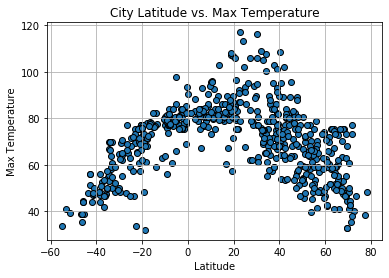

In [16]:
# Plot scatter points to visualize relationship between latitude and temperatue 
plt.scatter(lat, max_temp, marker ="o",edgecolor="black" )
plt.grid(True)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs. Max Temperature")

plt.show()

#### Latitude vs. Humidity Plot

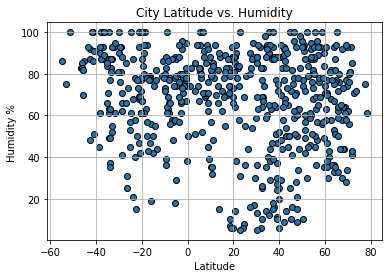

In [17]:
# Plot scatter points to visualize relationship between latitude and humidity 
plt.scatter(lat, humidity, marker ="o",edgecolor="black" )
plt.grid(True)

plt.xlabel("Latitude")
plt.ylabel("Humidity % ")
plt.title("City Latitude vs. Humidity")

plt.show()

#### Latitude vs. Cloudiness Plot

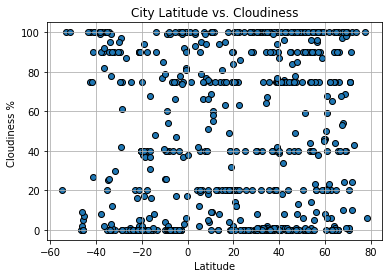

In [18]:
# Plot scatter points to visualize relationship between latitude and cloudiness 
plt.scatter(lat, cloudiness, marker ="o",edgecolor="black" )
plt.grid(True)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness % ")
plt.title("City Latitude vs. Cloudiness")

plt.show()

#### Latitude vs. Wind Speed Plot

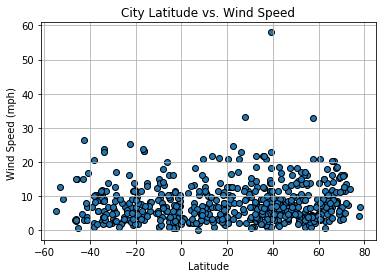

In [19]:
# Plot scatter points to visualize relationship between latitude and wind speed 
plt.scatter(lat, wind_speed, marker ="o",edgecolor="black" )
plt.grid(True)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph) ")
plt.title("City Latitude vs. Wind Speed")

plt.show()